## Vectors and Matrices in Python

In [115]:
import numpy as np

In [116]:
# Qubit state vectors:  ∣0⟩ and ∣1⟩
ket0 = np.array([1, 0])
ket1 = np.array([0, 1])

# Average of ∣0⟩ and ∣1⟩
display(ket0 / 2 + ket1 / 2)

array([0.5, 0.5])

In [117]:
 # Matrices (i.e. operations)
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 1], [1, 0]])

# Average of M1 and M2
display(M1 / 2 + M2 / 2)

array([[1. , 1. ],
       [0.5, 0. ]])

In [118]:
# Matrix multiplication
display(np.matmul(M1, ket1))
display(np.matmul(M1, M2))
display(np.matmul(M2, M1))

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

## States, measurements, and operations

### Defining and displaying state vectors

In [119]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

In [120]:
# Defining state vectors with QisKit's Statevector class
u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


In [121]:
# Visualising or "drawing" QisKit's Statevectors
display(u.draw("latex"))
display(v.draw("latex"))
display(w.draw("text"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

[0.33333333+0.j,0.66666667+0.j]

In [122]:
# Checking if the quantum states are valid (their Euclidian norms equal to 1)
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

True

False

### Simulating measurements using `Statevector`

In [123]:
# Defining a Qubit vector
v = Statevector([(1 + 2.0j) / 3, -2 / 3])

display(v.draw("latex"))
display(v.is_valid())

<IPython.core.display.Latex object>

True

In [124]:
# Simulate a standard basis measurement
v.measure()

('1',
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

{'0': 511, '1': 489}

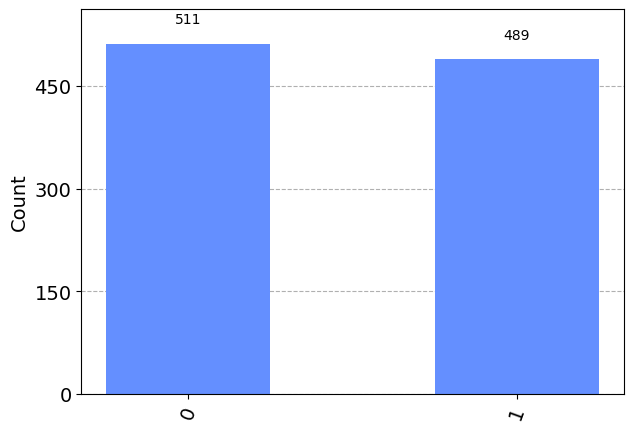

In [125]:
from qiskit.visualization import plot_histogram

# Simulate 1000 standard basis measurements (expect approx 556/1000 to be 0 and 444/1000 to be 1)
v_statistics = v.sample_counts(1000)
display(v_statistics)
plot_histogram(v_statistics)

### Performing operations with  Operator  and  Statevector

In [126]:
from qiskit.quantum_info import Operator

# Pauli operators
X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])   
Z = Operator([[1, 0], [0, -1]])

# Hadamard operator
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])

# Phase operators
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

# Quantum state vector
v = Statevector([1, 0])

# Performing operations on the state vector (i.e. evolving the quantum system)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

### Looking ahead to quantum circuits

In [127]:
from qiskit import QuantumCircuit

# Build a quantum circuit (which in this case will simply be a sequence of unitary operations performed on a single qubit)
circuit = QuantumCircuit(1)

# Adding operations to the circuit
circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

# Visualising the circuit
circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [128]:
# Initialise a quantum state vector
ket0 = Statevector([1, 0])

# Evolve the state according to the sequence of operations in the circuit
v = ket0.evolve(circuit)

v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

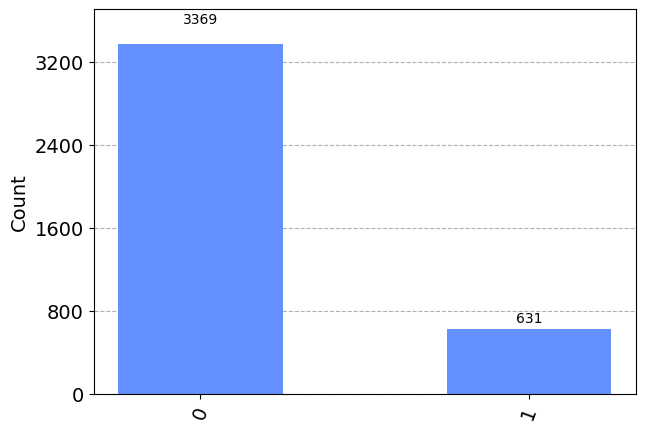

In [129]:
# Simulate the result of running this experiment 4000 times
v_statistics = v.sample_counts(4000)
plot_histogram(v_statistics)